In [1]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta

from analysis_utils import get_label_count, get_num_appearances, get_genres, get_genre_list, get_genre_intersections,get_genre_intersection_props, get_gender_distribution

In [2]:
data = pd.read_csv('all_tracks.csv')

### Gender Data

In [3]:
gender_nan = data[data['gender'].isna()]
print('Amount of missing gender labels: %s of %s total tracks' % (len(gender_nan), len(data)))

Amount of missing gender labels: 38924 of 198615 total tracks


In [4]:
print('Amount of unique tracks missing gender label: ', len(gender_nan['track_id'].unique()))
print('Amount of unique artists missing gender label: ', len(gender_nan['artist_id'].unique()))

Amount of unique tracks missing gender label:  4790
Amount of unique artists missing gender label:  3234


In [5]:
nan_counts = gender_nan.groupby('artist_id').count().reset_index()
print('Amount of missing artists that appear more than twice: ', len(nan_counts[nan_counts['index'] > 2]))

Amount of missing artists that appear more than twice:  2498


#### Gender distribution across all tracks

In [6]:
men = len(data[data['gender'] == 1])
women = len(data[data['gender'] == 0])
print('Male artists: ', men/(men+women))
print('Female artists: ', women/(men+women))

Male artists:  0.766117063579037
Female artists:  0.23388293642096297


### Genre 
#### Categories
From wikipedia list:
    - Afro (not included)
    - Comedy (not include)
    - Avant-garde (not included)
    - Blues
    - Caribbean and Caribbean-influenced (not included)
    - Easy Listening (not included)
    - Country 
    - Electronic
    - Folk
    - Flamenco (not included)
    - Hip Hop
    - Jazz 
    - Latin
    - Pop
    - R&B and Soul
    - Rock
Added:
    - House
    - Rap
    - Indie

### Partition Genres

In [52]:
pd.options.mode.chained_assignment = None

hip_list = get_genre_list(data,'hip hop')
hip_hop = data.iloc[hip_list,:]
hip_hop['genre'] = 'hh'
hip_hop.name = 'hip_hop'

rock_list = get_genre_list(data,'rock')
rock = data.iloc[rock_list,:]
rock['genre'] = 'rk'
rock.name = 'rock'

a_g_list = get_genre_list(data,'avant-garde')
a_g = data.iloc[a_g_list,:]
a_g['genre'] = 'ag'
a_g.name = 'a_g'

blues_list = get_genre_list(data,'blues')
blues = data.iloc[blues_list,:]
blues['genre'] = 'bl'
blues.name = 'blues'

country_list = get_genre_list(data,'country')
country = data.iloc[country_list,:]
country['genre'] = 'ct'
country.name = 'country'

electronic_list = get_genre_list(data,'(electronic)|(edm)')
electronic = data.iloc[electronic_list,:]
electronic['genre'] = 'el'
electronic.name = 'electronic'

folk_list = get_genre_list(data,'folk')
folk = data.iloc[folk_list,:]
folk['genre'] = 'fk'
folk.name = 'folk'

flamenco_list = get_genre_list(data,'flamenco')
flamenco = data.iloc[flamenco_list,:]
flamenco['genre'] = 'fl'
flamenco.name = 'flamenco'

jazz_list = get_genre_list(data,'jazz')
jazz = data.iloc[jazz_list,:]
jazz['genre'] = 'jz'
jazz.name = 'jazz'

latin_list = get_genre_list(data,'latin')
latin = data.iloc[latin_list,:]
latin['genre'] ='la'
latin.name = 'latin'

pop_list = get_genre_list(data,'pop')
pop = data.iloc[pop_list,:]
pop['genre'] = 'pp'
pop.name = 'pop'

r_b_list = get_genre_list(data,'(r&b)|(soul)')
r_b = data.iloc[r_b_list,:]
r_b['genre'] = 'rb'
r_b.name = "r&b/soul"

indie_list = get_genre_list(data,'indie')
indie = data.iloc[indie_list,:]
indie['genre'] = 'in'
indie.name = 'indie'

house_list = get_genre_list(data,'house')
house = data.iloc[house_list,]
house['genre'] = 'hs'
house.name = 'house'

rap_list = get_genre_list(data,'rap')
rap = data.iloc[rap_list,]
rap['genre'] = 'rp'
rap.name = 'rap'

In [8]:
all_genres = pd.concat([hip_hop, pop, rock, a_g, blues, rap, country, electronic, folk, indie, flamenco, jazz, latin, r_b, house])

In [9]:
intersections = get_genre_intersections(all_genres)
intersections.columns = ['hip-hop','house','rock','blues','country','edm','folk','jazz','latin','pop','r&b','indie','rap']

In [53]:
genre_list = [hip_hop, pop, rock, a_g, blues, rap, country, electronic, folk, indie, flamenco, jazz, latin, r_b, house]
for genre in genre_list:
    print('%s: %d tracks' % (str(genre.name), len(genre)))

hip_hop: 18369 tracks
pop: 109776 tracks
rock: 19571 tracks
a_g: 95 tracks
blues: 670 tracks
rap: 28990 tracks
country: 4468 tracks
electronic: 32664 tracks
folk: 13430 tracks
indie: 22355 tracks
flamenco: 21 tracks
jazz: 2696 tracks
latin: 11356 tracks
r&b/soul: 13698 tracks
house: 43592 tracks


### 'Other' Category

In [16]:
other = data[~data['index'].isin(all_genres['index'])]

In [17]:
print('Amount of tracks not categorized:', len(other))
print('Amount of unique tracks not categorized:', len(other['track_id'].unique()))

Amount of tracks not categorized: 42442
Amount of unique tracks not categorized: 5093


In [18]:
other_dropped = other[~(other['artist_genres'].isna())]

#### After dropping NaN's

In [19]:
print("Amount of tracks in 'other' category: ", len(other_dropped))
print("Amount of unique tracks in 'other' category: ", len(other_dropped['track_id'].unique()))

Amount of tracks in 'other' category:  23022
Amount of unique tracks in 'other' category:  2470


### Genre intersection by count

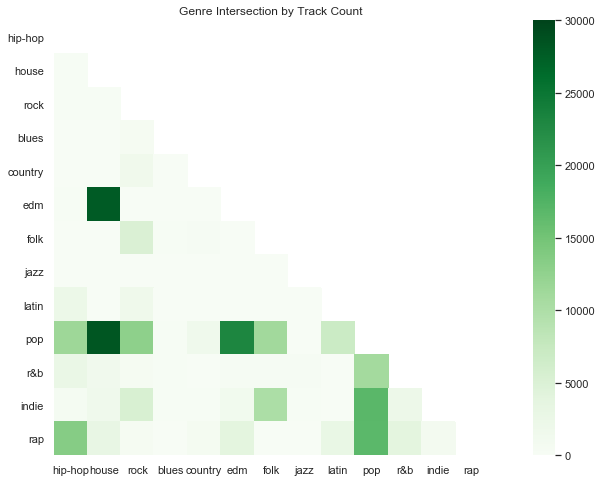

In [40]:
import seaborn as sns; sns.set()
mask = np.zeros_like(intersections)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(intersections, mask=mask, vmax=30000, square=True, cmap='Greens').set_title('Genre Intersection by Track Count')
sns.set(rc={'figure.figsize':(16,10)})

### Genre intersection by proportion of songs

In [11]:
intersection_prop = get_genre_intersection_props(all_genres)
intersection_prop.columns = ['hip-hop','house','rock','blues','country','edm','folk','jazz','latin','pop','r&b','indie','rap']

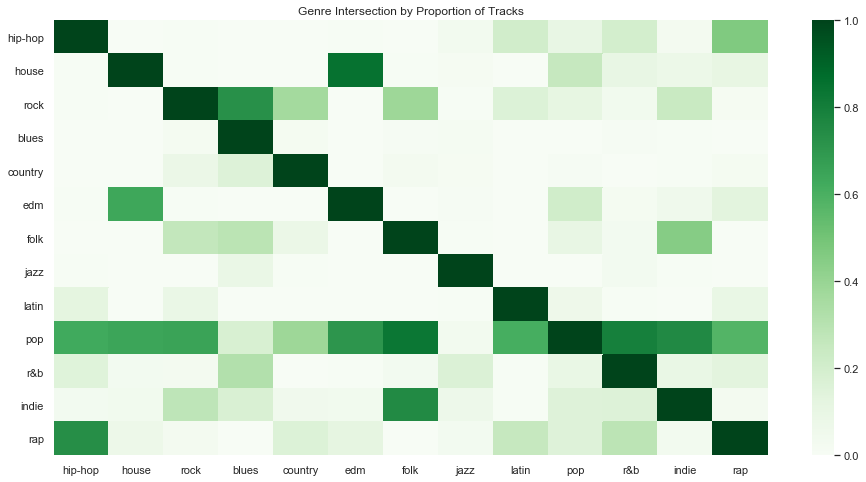

In [39]:
ax = sns.heatmap(intersection_prop, cmap='Greens').set_title('Genre Intersection by Proportion of Tracks')
sns.set(rc={'figure.figsize':(16,8)})

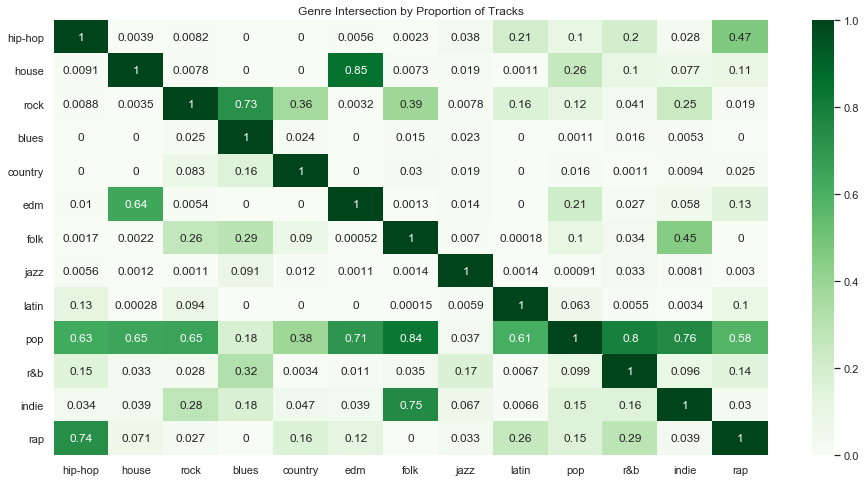

In [13]:
ax = sns.heatmap(intersection_prop, cmap='Greens', annot=True).set_title('Genre Intersection by Proportion of Tracks')
sns.set(rc={'figure.figsize':(16,8)})

### How popular is pop?

In [14]:
# Tracks with 'pop' tag
unique_pop = pop.drop_duplicates('index')
unique_pop[['track_popularity', 'artist_popularity']].describe()

,track_popularity,artist_popularity
count,109776.000000,109776.000000
mean,59.465903,75.222936
std,21.494452,13.368514
min,0.000000,13.000000
25%,49.000000,66.000000
50%,63.000000,77.000000
75%,75.000000,86.000000
max,100.000000,100.000000


In [15]:
# Tracks without 'pop' tag
non_pop = all_genres[~(all_genres['index'].isin(pop['index']))]
non_pop.drop_duplicates('index', inplace=True)
non_pop[['track_popularity', 'artist_popularity']].describe()

,track_popularity,artist_popularity
count,46397.000000,46397.000000
mean,54.323426,66.701877
std,20.488703,15.584609
min,0.000000,7.000000
25%,43.000000,55.000000
50%,55.000000,67.000000
75%,69.000000,79.000000
max,98.000000,99.000000


### Gender distribution by genre

In [20]:
rap_perc, electronic_perc, pop_perc = get_gender_distribution(rap), get_gender_distribution(electronic), get_gender_distribution(pop)

In [21]:
hip_hop_perc, rock_perc, a_g_perc = get_gender_distribution(hip_hop), get_gender_distribution(rock), get_gender_distribution(a_g)

In [22]:
blues_perc, country_perc, folk_perc = get_gender_distribution(blues), get_gender_distribution(country), get_gender_distribution(folk)

In [23]:
jazz_perc, latin_perc, r_b_perc = get_gender_distribution(jazz), get_gender_distribution(latin), get_gender_distribution(r_b)

In [24]:
indie_perc, house_perc = get_gender_distribution(indie), get_gender_distribution(house)

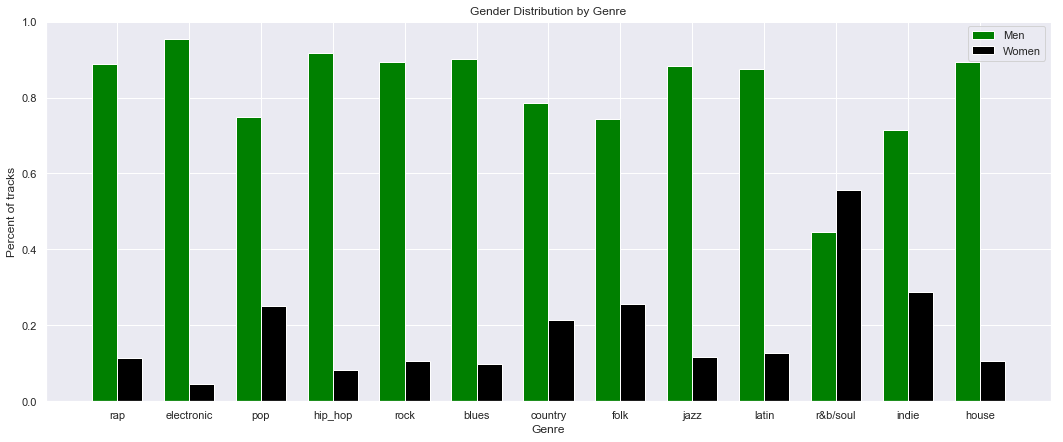

In [25]:
import matplotlib.pyplot as plt
N = 13
men_means = (rap_perc, electronic_perc, pop_perc,hip_hop_perc,rock_perc,blues_perc,country_perc,folk_perc,jazz_perc,latin_perc,r_b_perc,indie_perc,house_perc)
women_means = (1-rap_perc, 1-electronic_perc, 1-pop_perc,1-hip_hop_perc,1-rock_perc,1-blues_perc,1-country_perc,1-folk_perc,1-jazz_perc,1-latin_perc,1-r_b_perc,1-indie_perc,1-house_perc)

ind = np.arange(N)
width = 0.35
plt.figure(figsize=(18,7))
plt.bar(ind, men_means, width, label='Men', color='green')
plt.bar(ind + width, women_means, width,
    label='Women', color='black')

plt.ylabel('Percent of tracks')
plt.xlabel('Genre')
plt.title('Gender Distribution by Genre')

plt.xticks(ind + width / 2, ('rap', 'electronic', 'pop','hip_hop','rock','blues','country','folk','jazz','latin','r&b/soul','indie','house'))
plt.legend(loc='best')
plt.show(10,10)

### Chi Squared Test for Independence

    Ho: Artist Gender and Genre are independent.

    Ha: Artist Gender and Genre are dependent.

In [26]:
table = [[23646,30124,76384,15670,16421,85,590,3237,9089,1596,9774,5932,13838,35619],
        [3007,1436,25642,1422,1965,10,65,882,3128,212,1409,1704,5556,4276]]

In [27]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(table)
print('dof = %d' % dof)

prob = 0.95
alpha = 1.0 - prob
critical = chi2.ppf(prob, dof)
print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
print('significance = %.3f, p = %.3f' % (alpha, p))

dof = 13
probability = 0.950, critical = 22.362, stat = 14110.079
significance = 0.050, p = 0.000


    -> reject null hypothesis. Gender and genre are dependent.

### Playlist/Label independence test

In [28]:
suspicious_playlists = pd.read_csv('suspicious_playlists.csv')

In [29]:
playlists = suspicious_playlists[suspicious_playlists['%'] > 0.50]

In [30]:
playlists

,playlist,total_track_count,%,label
0,NCS_Releases_-_NoCopyrightSounds,905,0.994475,NCS
1,The_Chillhop_Cafe,2250,0.979556,Chillhop Records
2,Sertanejo_2019_-_Melhores_Sertanejas!,1762,0.804200,Sony Music Entertainment
3,Trap_Nation,1750,0.748571,Lowly
4,Disney_Hits,1068,0.693820,Walt Disney Records
5,Electronica_2019,1521,0.667324,Strange Fruits
6,Eletronicas_2019_(Eletronicas_Mais_Tocadas),2362,0.555038,Sony Music Entertainment
7,lofi_hip_hop_beats,2250,0.536444,Chillhop Records


### Visualizing Acoustic Features 

In [31]:
jazz_unique = jazz.drop_duplicates(subset='track_id')
country_unique = country.drop_duplicates(subset='track_id')
hip_hop_unique = hip_hop.drop_duplicates(subset='track_id')
house_unique = house.drop_duplicates(subset='track_id')
rock_unique = rock.drop_duplicates(subset='track_id')
blues_unique = blues.drop_duplicates(subset='track_id')
edm_unique = electronic.drop_duplicates(subset='track_id')
folk_unique = folk.drop_duplicates(subset='track_id')
latin_unique = latin.drop_duplicates(subset='track_id')
pop_unique = pop.drop_duplicates(subset='track_id')
r_b_unique = r_b.drop_duplicates(subset='track_id')
indie_unique= indie.drop_duplicates(subset='track_id')
rap_unique = rap.drop_duplicates(subset='track_id')

In [32]:
cols = ['genre','danceability','energy','key','loudness','mode','speechiness',
            'instrumentalness','acousticness','valence','tempo','liveness']

In [33]:
pop_mean = pop_unique[cols].mean().to_frame().T
jazz_mean = jazz_unique[cols].mean().to_frame().T
country_mean = country_unique[cols].mean().to_frame().T
hip_hop_mean = hip_hop_unique[cols].mean().to_frame().T
house_mean = house_unique[cols].mean().to_frame().T
rock_mean = rock_unique[cols].mean().to_frame().T
blues_mean = blues_unique[cols].mean().to_frame().T
edm_mean = edm_unique[cols].mean().to_frame().T
folk_mean = folk_unique[cols].mean().to_frame().T
latin_mean = latin_unique[cols].mean().to_frame().T
r_b_mean = r_b_unique[cols].mean().to_frame().T
indie_mean = indie_unique[cols].mean().to_frame().T
rap_mean = rap_unique[cols].mean().to_frame().T

In [55]:
pop_mean['genre'] = 0/12
rap_mean['genre'] = 1/12
jazz_mean['genre'] = 2/12
country_mean['genre'] = 3/12
hip_hop_mean['genre'] = 4/12
house_mean['genre'] = 5/12
rock_mean['genre'] = 6/12
blues_mean['genre'] = 7/12
edm_mean['genre'] = 8/12
folk_mean['genre'] = 9/12
latin_mean['genre'] = 10/12
r_b_mean['genre'] = 11/12
indie_mean['genre'] = 12/12

In [56]:
df = pd.concat([jazz_mean, country_mean,pop_mean,hip_hop_mean,house_mean,rock_mean,blues_mean,edm_mean,folk_mean,latin_mean,r_b_mean,indie_mean,rap_mean])

In [57]:
import plotly as py
import plotly.graph_objs as go
import os
plot_data = [
    go.Parcoords(
        line = dict(color = df['genre'],
                   colorscale = [[0/12, '#6C9E12'], 
                                [1/12,'#0D5F67'], 
                                [2/12,'yellow'], 
                                [3/12, '#69178C'], 
                                [4/12, '#DE9733'],
                                [5/12, 'darkolivegreen'],
                                [6/12, '#7f7f7f'],
                                [7/12, '#e377c2'],
                                [8/12, 'cyan'],
                                [9/12, 'limegreen'],
                                [10/12, 'dodgerblue'],
                                [11/12, 'red'],
                                [12/12, 'navy']]), 
        dimensions = list([
            dict(range = [0.1,0.62],
                label = 'acousticness', values = df['acousticness']),
            dict(range = [0.35, 0.6],
                label = 'valence', values = df['valence']),
            dict(range = [105,125],
                label = 'tempo', values = df['tempo']),
            dict(range = [-13.5, -5.5],
                label = 'loudness', values = df['loudness']),
            dict(range = [0.3, 0.8],
                label = 'energy', values = df['energy']),
            dict(range = [0.04,0.2],
                label = 'speechiness', values = df['speechiness']),
            dict(range = [4.8,5.5],
                label = 'key', values = df['key']),
            dict(range = [0.50, .75],
                label = 'danceability', values = df['danceability']),
            dict(range = [0.006,0.6],
                label = 'instrumentalness', values = df['instrumentalness']),
            dict(range = [0.14,0.22],
                label = 'liveness', values = df['liveness'])
           
        ]),
    )
]

layout = go.Layout(
    autosize=True,
    title='Average Auditory Features by Genre'
)

labels = [
        dict(xref='paper', yref='paper', x=0.03, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="jazz",
                              font=dict(family='Arial',
                                        size=14,
                                        color='yellow'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.1, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="pop",
                              font=dict(family='Arial',
                                        size=14,
                                        color='#6C9E12'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.17, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="rap",
                              font=dict(family='Arial',
                                        size=14,
                                        color='#0D5F67'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.24, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="country",
                              font=dict(family='Arial',
                                        size=14,
                                        color='#69178C'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.31, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="hip-hop",
                              font=dict(family='Arial',
                                        size=14,
                                        color='#DE9733'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.38, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="house",
                              font=dict(family='Arial',
                                        size=14,
                                        color='darkolivegreen'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.45, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="rock",
                              font=dict(family='Arial',
                                        size=14,
                                        color='#7f7f7f'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.52, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="blues",
                              font=dict(family='Arial',
                                        size=14,
                                        color='#e377c2'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.59, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="edm",
                              font=dict(family='Arial',
                                        size=14,
                                        color='cyan'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.66, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="folk",
                              font=dict(family='Arial',
                                        size=14,
                                        color='limegreen'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.73, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="latin",
                              font=dict(family='Arial',
                                        size=14,
                                        color='dodgerblue'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.80, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="r&b",
                              font=dict(family='Arial',
                                        size=14,
                                        color='red'),
                              showarrow=False),
        dict(xref='paper', yref='paper', x=0.87, y=-0.085,
                              xanchor='center', yanchor='top',
                              text="indie",
                              font=dict(family='Arial',
                                        size=14,
                                        color='navy'),
                              showarrow=False),
        ]
layout['annotations'] = labels

fig = go.Figure(data = plot_data, layout = layout)
fig

In [67]:
df2 = df.sort_values(by=['genre'],ascending=True)
df2.index = ['pop','rap','jazz','country','hip_hop','house','rock','blues','edm','folk','latin','r&b','indie']

In [68]:
df2

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,acousticness,valence,tempo,liveness,genre
pop,0.634302,0.653854,5.221320,-6.583122,0.624918,0.086936,0.047530,0.253165,0.473252,120.615777,0.184616,0.000000
rap,0.704603,0.681661,5.209825,-6.068286,0.552932,0.169761,0.051127,0.155572,0.464321,123.139260,0.186737,0.083333
jazz,0.578202,0.323449,5.342205,-13.332042,0.520913,0.088397,0.564940,0.610038,0.356243,105.071597,0.147783,0.166667
country,0.586528,0.671035,5.188889,-6.458981,0.877778,0.045913,0.006996,0.236455,0.560721,119.849183,0.162572,0.250000
hip_hop,0.739920,0.659226,5.217245,-6.442760,0.546473,0.199304,0.013783,0.163806,0.524608,121.002417,0.181883,0.333333
house,0.629168,0.777436,5.326566,-5.973016,0.515539,0.077659,0.200492,0.109775,0.395071,124.308512,0.212783,0.416667
rock,0.570035,0.642132,5.117916,-7.723881,0.753656,0.051518,0.059099,0.265054,0.529508,121.151175,0.175923,0.500000
blues,0.531756,0.631577,4.858974,-8.950590,0.820513,0.059265,0.063540,0.256485,0.592023,123.632936,0.177250,0.583333
edm,0.619794,0.781797,5.267629,-5.777963,0.518805,0.081180,0.187715,0.111665,0.383237,124.850424,0.220285,0.666667
folk,0.537428,0.476805,5.066782,-9.578625,0.771032,0.046612,0.067035,0.511825,0.411590,117.856901,0.148201,0.750000
